In [1]:
%matplotlib inline
import logging
logging.basicConfig(level=logging.CRITICAL)

In [2]:
import torch
import pytorch3d
from pytorch3d.ops import sample_points_from_meshes

# Creating Protein Meshes in Graphein & 3D Visualisation

Graphein provides functionality to create meshes of protein surfaces. The mesh computation is handled under the hood by PyMol to produce `.obj` files, which are handled by many geometric analysis libraries (such as PyTorch3D). We'll create a few protein meshes, convert them to PyTorch3D objects and visualises them. Again, there is a high-level and low-level API for convenience.

## High-level API
### Config
Again, we use a config object to manage global configurations.

* `pymol_command_line_options`: String of additional pymol command line options when launching. A full list can be found [here](https://www.pymolwiki.org/index.php/Command_Line_Options). The default options, `"-cKq"`, do:
   * `c`: launch in command-line only mode for batch processing
   * `K`: keep alive: when running without a GUI, don't quit after the input
            is exhausted
    * `q`: supress startup message 
    
* `pymol_commands` : List of string pymol commands to execute. You can use these to configure the exact mesh you wish to construct. A reference to these can be found [here](https://pymol.org/pymol-command-ref.html)

In [3]:
from graphein.protein.config import ProteinMeshConfig
config = ProteinMeshConfig()
config.dict()

{'pymol_command_line_options': '-cKq', 'pymol_commands': ['show surface']}

### Building a mesh

Let's build a mesh!

In [4]:
from graphein.protein.meshes import create_mesh

verts, faces, aux = create_mesh(pdb_code="3eiy", config=config)
print(verts, faces, aux)

['show surface']
tensor([[ 15.8122,   1.6800, -12.6172],
        [ 15.8122,   1.6800, -12.6172],
        [ 15.8122,   1.6800, -12.6172],
        ...,
        [ -0.4122,  -4.8908, -22.1995],
        [ -0.9220,  -4.5393, -22.6980],
        [ -0.5758,  -4.8370, -22.0182]]) Faces(verts_idx=tensor([[     0,      1,      2],
        [     3,      4,      5],
        [     6,      7,      8],
        ...,
        [109641, 109643, 109642],
        [109644, 109646, 109645],
        [109647, 109649, 109648]]), normals_idx=tensor([[    -1,     -1,     -1],
        [    -1,     -1,     -1],
        [    -1,     -1,     -1],
        ...,
        [109605, 109607, 109606],
        [109608, 109610, 109609],
        [109611, 109613, 109612]]), textures_idx=tensor([[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1]]), materials_idx=tensor([-1, -1, -1,  ..., -1, -1, -1])) Properties(normals=tensor([[-0.3031, -0.6665,  0.

In order to visualise these tensors containing vertices, faces and aux data, we convert them into a PyTorch3D `Mesh` object

/home/atj39/github/graphein/graphein/protein/visualisation.py:46: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<Axes3D:title={'center':'my first mesh'}, xlabel='x', ylabel='z'>

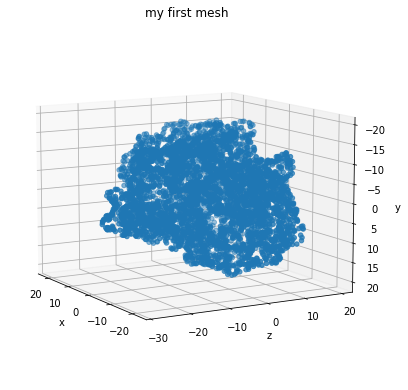

In [5]:
from graphein.protein.meshes import convert_verts_and_face_to_mesh
m = convert_verts_and_face_to_mesh(verts, faces)

from graphein.protein.visualisation import plot_pointcloud
plot_pointcloud(m, title="my first mesh")

## Modifying Mesh Parameters

Let's see what happens if we play around with some of the parameters and make a smoother mesh using

['hide cartoon', 'set solvent_radius, 10', 'alter all, vdw=4', 'sort', 'set surface_quality, 1', 'show surface']


/home/atj39/github/graphein/graphein/protein/visualisation.py:46: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<Axes3D:title={'center':'my second mesh'}, xlabel='x', ylabel='z'>

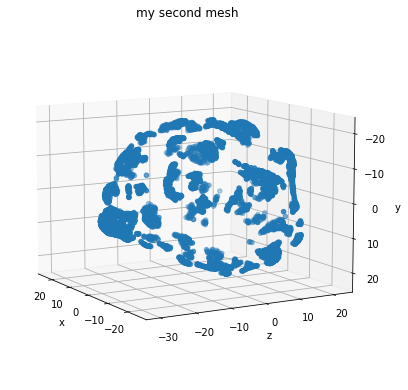

In [6]:
pymol_commands = {"pymol_commands": ["hide cartoon",
                                     "set solvent_radius, 10",
                                     "alter all, vdw=4",
                                     "sort",
                                     "set surface_quality, 1",
                                     "show surface"]}

config = ProteinMeshConfig(**pymol_commands)

verts, faces, aux = create_mesh(pdb_code="3eiy", config=config)

m = convert_verts_and_face_to_mesh(verts, faces)

plot_pointcloud(m, title="my second mesh")

## Using PyMol for 3D Visualisation
We also provide a wrapper for pymol (based on [IPyMol](https://github.com/cxhernandez/ipymol) developed by [@cxhernandez](https://github.com/cxhernandez))

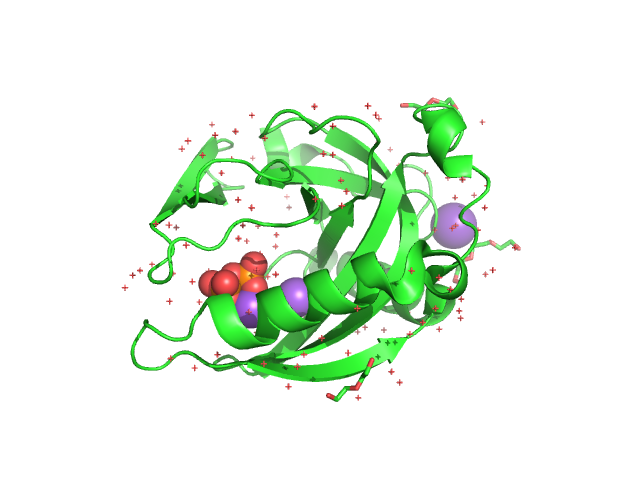

In [8]:
from graphein.utils.pymol import viewer as pymol

pymol.fetch("3eiy")
pymol.display()